In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("../data/amazon_delivery.csv")


In [5]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [26]:
# Option 1: Fill with a placeholder
df['Weather'].fillna('Unknown', inplace=True)
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace=True)  # fill ratings with mean


C:\Users\HP\AppData\Local\Temp\ipykernel_3364\128372210.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace=True)  # fill ratings with mean


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [7]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%Y-%m-%d', errors='coerce')


In [8]:
df['Pickup_Time'] = pd.to_datetime(
    df['Order_Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Pickup_Time'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)


In [9]:
df['Delivery_Time'] = df['Order_Date'] + pd.to_timedelta(df['Delivery_Time'], unit='m')


In [10]:
df.info()
df[['Order_Date', 'Pickup_Time', 'Delivery_Time']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43685 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43739 non-null  object        
 9   Pickup_Time      43739 non-null  datetime64[ns]
 10  Weather          43648 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery_Time    43739 non-null  datet

,Order_Date,Pickup_Time,Delivery_Time
0,2022-03-19,2022-03-19 11:45:00,2022-03-19 02:00:00
1,2022-03-25,2022-03-25 19:50:00,2022-03-25 02:45:00
2,2022-03-19,2022-03-19 08:45:00,2022-03-19 02:10:00
3,2022-04-05,2022-04-05 18:10:00,2022-04-05 01:45:00
4,2022-03-26,2022-03-26 13:45:00,2022-03-26 02:30:00


In [11]:
df.isna().sum()


Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [12]:
df.describe(include='all')


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
count,43739,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739,43739,43739,43648,43739,43739,43739,43739,43739
unique,43739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,NaN,6,5,4,4,NaN,16
top,nsyz997960170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21:55:00,NaN,Fog,Low,motorcycle,Metropolitian,NaN,Electronics
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460,NaN,7440,14999,25527,32698,NaN,2849
mean,NaN,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,2022-03-13 15:58:10.697089792,NaN,2022-03-14 09:35:59.404650496,NaN,NaN,NaN,NaN,2022-03-13 18:03:05.035780608,NaN
min,NaN,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,NaN,2022-02-11 00:00:00,NaN,NaN,NaN,NaN,2022-02-11 00:10:00,NaN
25%,NaN,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,2022-03-04 00:00:00,NaN,2022-03-04 22:45:00,NaN,NaN,NaN,NaN,2022-03-04 03:20:00,NaN
50%,NaN,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,2022-03-15 00:00:00,NaN,2022-03-15 16:20:00,NaN,NaN,NaN,NaN,2022-03-15 01:50:00,NaN
75%,NaN,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,2022-03-27 00:00:00,NaN,2022-03-27 18:05:00,NaN,NaN,NaN,NaN,2022-03-27 01:30:00,NaN
max,NaN,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,NaN,2022-04-06 23:55:00,NaN,NaN,NaN,NaN,2022-04-06 04:30:00,NaN


In [13]:
df['Weather'].value_counts()
df['Traffic'].value_counts()
df['Category'].value_counts()


Category
Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name: count, dtype: int64

In [14]:
# Option 1: Fill with a placeholder
df['Weather'].fillna('Unknown', inplace=True)
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace=True)  # fill ratings with mean


C:\Users\HP\AppData\Local\Temp\ipykernel_3364\128372210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna('Unknown', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3364\128372210.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

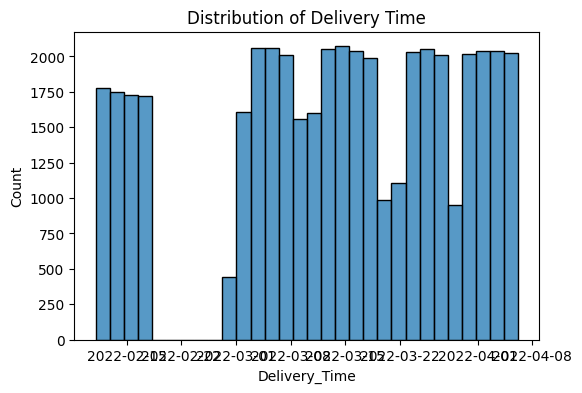

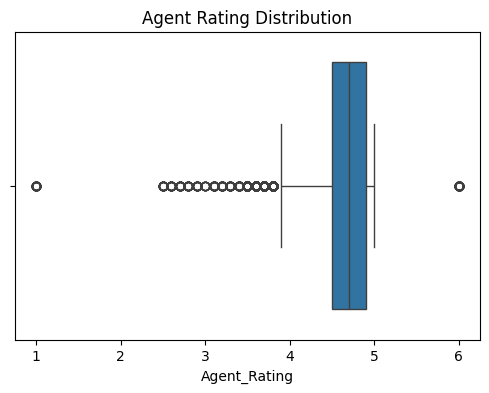

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Delivery Time
plt.figure(figsize=(6,4))
sns.histplot(df['Delivery_Time'], bins=30)
plt.title('Distribution of Delivery Time')
plt.show()

# Boxplot of Agent Rating
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Agent_Rating'])
plt.title('Agent Rating Distribution')
plt.show()


In [16]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)


In [17]:
# Compute duration in minutes
df['Delivery_Duration_Minutes'] = (df['Delivery_Time'] - df['Order_Date']).dt.total_seconds() / 60


In [18]:
df['Is_Delayed'] = (df['Delivery_Duration_Minutes'] > 120).astype(int)


In [19]:
df[['Delivery_Duration_Minutes', 'Is_Delayed']].head()


,Delivery_Duration_Minutes,Is_Delayed
0,120.0,0
1,165.0,1
2,130.0,1
3,105.0,0
4,150.0,1


In [20]:
df['Churned'] = ((df['Is_Delayed'] == 1) & (df['Agent_Rating'] <= 2)).astype(int)
df[['Is_Delayed', 'Agent_Rating', 'Churned']].head()


,Is_Delayed,Agent_Rating,Churned
0,0,4.9,0
1,1,4.5,0
2,1,4.4,0
3,0,4.7,0
4,1,4.6,0


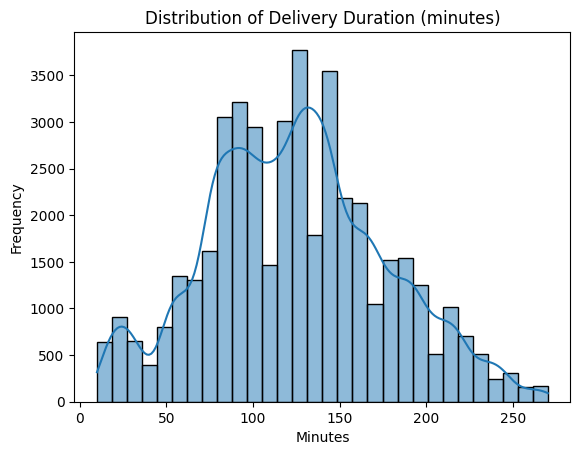

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Delivery_Duration_Minutes'], bins=30, kde=True)
plt.title('Distribution of Delivery Duration (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()


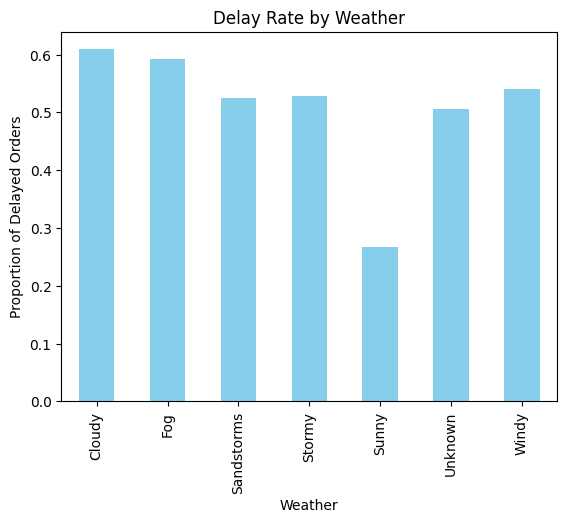

In [22]:
df.groupby('Weather')['Is_Delayed'].mean().plot(kind='bar', color='skyblue')
plt.title('Delay Rate by Weather')
plt.ylabel('Proportion of Delayed Orders')
plt.show()


<Axes: xlabel='Traffic'>

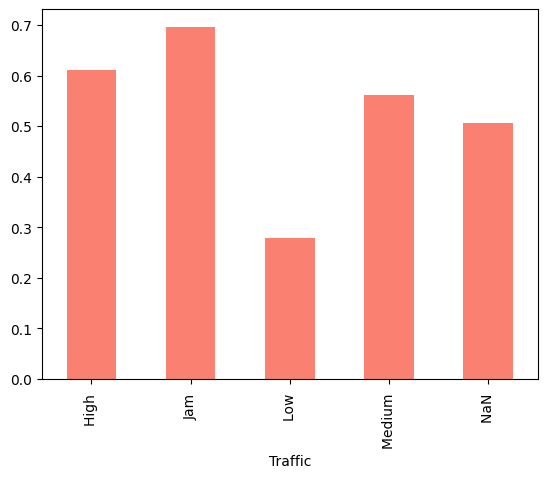

In [23]:
df.groupby('Traffic')['Is_Delayed'].mean().plot(kind='bar', color='salmon')



In [24]:
df.to_csv('cleaned_amazon_delivery.csv', index=False)
